In [1]:
import numpy as np
def filter(x):
    
# set y to have the same length and type as x
    y = np.zeros_like(x)
    h_n = [-0.0147,0.173,0.342,0.342,0.173,-0.0147]

#compute 𝑦(𝑛) and store it in y[n]
    for n, x_n in enumerate(x):         
        for k in range(len(h_n)):
            if((n-k)>=0 and k+n < len(h_n)):
                y[n] += (h_n[k+n]*x[n-k])
            else:
                y[n] +=0 
            
        
        #Perform shift 
        for k in range(6,-1,-1):
            if(n+k-1 >= 0 and n+k <len(x)):
                x[n+k] = x[n+k-1]
            elif(n+k < len(x)): 
                x[n+k] = 0 
        
                       
    return y
        


In [2]:
impulse = np.zeros(6) #Generating impulse sequence
impulse[0] = 1

In [3]:
y = filter(impulse) #Passing impulse through filter

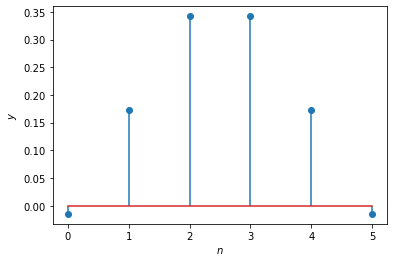

In [4]:
#Plotting the impulse response
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
n = np.arange(len(y))
ax.stem(n,y)
ax.set_xlabel('$n$')
ax.set_ylabel('$y$')
plt.show()

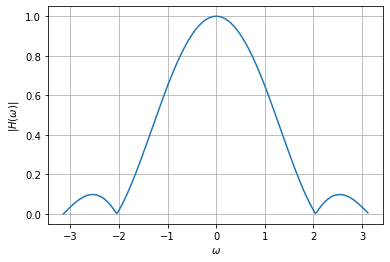

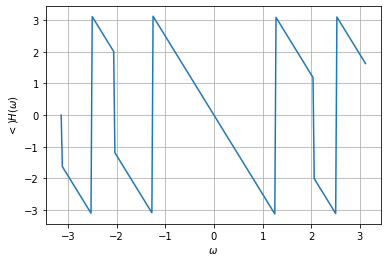

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq, fftshift

# use a 256-point DFT
H = fft(y, 256)
# frequencies 𝜔 corresponding to the output of fft
w = fftfreq(256) * 2 * np.pi
# shift so that 𝜔 = 0 is at the center
H = fftshift(H)
w = fftshift(w)

#plotting magnitude response
fig, ax = plt.subplots()
ax.plot(w, abs(H))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$|H(\\omega)|$')
ax.grid(True)

#plotting phase response
fig, ax = plt.subplots()
ax.plot(w, np.angle(H))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$ <) H(\\omega)$')
ax.grid(True)

plt.show()

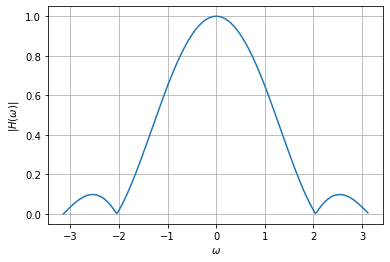

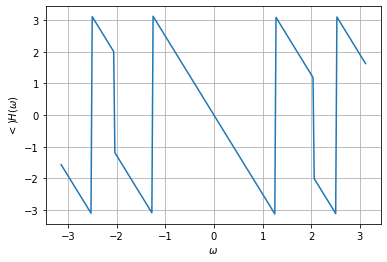

In [6]:
# frequencies 𝜔 corresponding to the output of fft
w = fftfreq(256) * 2 * np.pi
# shift so that 𝜔 = 0 is at the center
w = fftshift(w)

#Deriving H analytically 
H_Analytical = np.exp(-2.5j*w)*(-0.0294*np.cos(w*-(5/2)) + 0.346*np.cos(w*-(3/2)) + 0.684*np.cos(-w/2))

#plotting magnitude response
fig, ax = plt.subplots()
ax.plot(w, abs(H_Analytical))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$|H(\\omega)|$')
ax.grid(True)

#plotting phase response
fig, ax = plt.subplots()
ax.plot(w, np.angle(H_Analytical))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$ <) H(\\omega)$')
ax.grid(True)

plt.show()

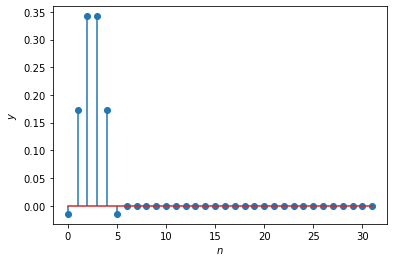

In [7]:
x = np.cos(np.arange(32) * 2.1) #using 2.1 or -2.1 does not make a difference since cosine is even 

response = filter(x)#passing through filter to get the response 

#Plotting (stem plot) 
fig, ax = plt.subplots()
n = np.arange(len(response))
ax.stem(n,response)
ax.set_xlabel('$n$')
ax.set_ylabel('$y$')
plt.show()

In [8]:
def filter_adjusted(x):
    
# set y to have the same length and type as x
    y = np.zeros_like(x)
    h_n_prime = [-0.0147,-0.173,0.342,-0.342,0.173,0.0147]

#compute 𝑦(𝑛) and store it in y[n]
    for n, x_n in enumerate(x):         
        for k in range(len(h_n_prime)):
            if((n-k)>=0 and k+n < len(h_n_prime)):
                y[n] += (h_n_prime[k+n]*x[n-k])
            else:
                y[n] +=0 
            
        
        #Perform shift 
        for k in range(6,-1,-1):
            if(n+k-1 >= 0 and n+k <len(x)):
                x[n+k] = x[n+k-1]
            elif(n+k < len(x)): 
                x[n+k] = 0 
        
                       
    return y

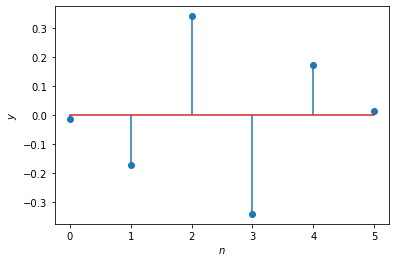

In [9]:
impulse = np.zeros(6) #Generating impulse sequence
impulse[0] = 1

y = filter_adjusted(impulse) #passing through new filter 

#Stem plot 
fig, ax = plt.subplots()
n = np.arange(len(y))
ax.stem(n,y)
ax.set_xlabel('$n$')
ax.set_ylabel('$y$')
plt.show()

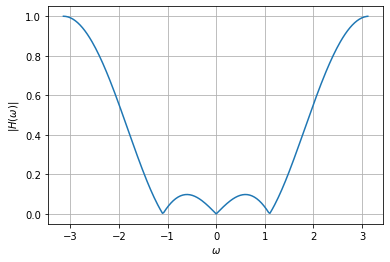

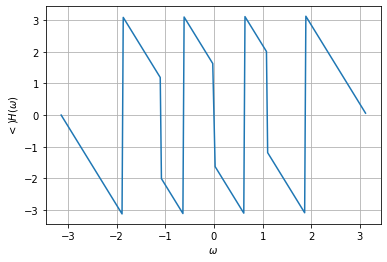

In [14]:
# use a 256-point DFT
H = fft(y, 256)
# frequencies 𝜔 corresponding to the output of fft
w = fftfreq(256) * 2 * np.pi
# shift so that 𝜔 = 0 is at the center
H = fftshift(H)
w = fftshift(w)

#plotting magnitude response
fig, ax = plt.subplots()
ax.plot(w, abs(H))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$|H(\\omega)|$')
#ax.set_xlim(-2.5,-1.5) #to zoom in 
#ax.set_ylim(-0.5,0.5)
ax.grid(True)

#plotting phase response
fig, ax = plt.subplots()
ax.plot(w, np.angle(H))
ax.set_xlabel('$\\omega$')
ax.set_ylabel('$ <) H(\\omega)$')
ax.grid(True)

plt.show()